In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.manifold as skmf



In [2]:
pheno = pd.read_table('bladder-pheno.txt', index_col=0)
dat = pd.read_table('bladder-expr.txt', index_col=0)

In [3]:
dat.shape

(22283, 57)

In [4]:
pheno.shape

(57, 5)

In [8]:
expr = dat.T
tsner = skmf.TSNE(n_components=2)
tsne_expr = tsner.fit_transform(expr)

/Users/calvinm/miniconda3/envs/condo/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/calvinm/miniconda3/envs/condo/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


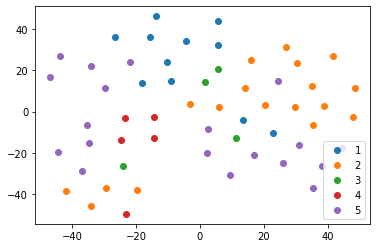

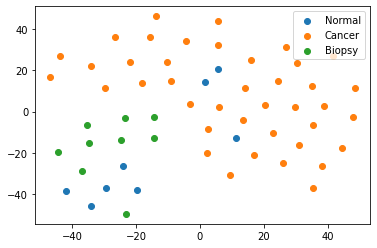

In [37]:
plt.figure();
for batch in range(1, 6):
    bixs = np.where(pheno.batch == batch)[0]
    plt.scatter(tsne_expr[bixs, 0], tsne_expr[bixs,1]);
plt.legend(list(range(1, 6)));

plt.figure();
for cancer in ["Normal", "Cancer", "Biopsy"]:
    bixs = np.where(pheno.cancer == cancer)[0]
    plt.scatter(tsne_expr[bixs, 0], tsne_expr[bixs,1]);
plt.legend(["Normal", "Cancer", "Biopsy"]);

In [49]:
pheno25 = pheno[pheno.batch.isin([2, 5])]
expr25 = expr[pheno.batch.isin([2, 5])]
print(pheno25.cancer.value_counts())
resmap = {"Normal": "NotCancer", "Cancer": "Cancer", "Biopsy": "NotCancer"}    
pheno25["result"] = pheno["cancer"].apply(lambda x: resmap[x])

pheno25.to_csv("pheno25.csv")
expr25.to_csv("expr25.csv")

Cancer    29
Normal     4
Biopsy     4
Name: cancer, dtype: int64


/var/folders/v4/3xrgrxhn7djdts76_v6vkfjc0000gn/T/ipykernel_76893/412698793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pheno25["result"] = pheno["cancer"].apply(lambda x: resmap[x])


In [42]:
pheno.cancer.value_counts()

Cancer    40
Biopsy     9
Normal     8
Name: cancer, dtype: int64

In [31]:
pheno[pheno.batch.isin([1, 2, 5])].cancer.value_counts()

Cancer    40
Normal     4
Biopsy     4
Name: cancer, dtype: int64

In [45]:
pheno25

,sample,outcome,batch,cancer,age,result
cel,,,,,,
GSM71020.CEL,2,Normal,2,Normal,2,NotCancer
GSM71021.CEL,3,Normal,2,Normal,3,NotCancer
GSM71025.CEL,7,Normal,2,Normal,7,NotCancer
GSM71026.CEL,8,Normal,2,Normal,1,NotCancer
GSM71028.CEL,9,sTCC+CIS,5,Cancer,2,Cancer
GSM71029.CEL,10,sTCC-CIS,2,Cancer,3,Cancer
GSM71030.CEL,11,sTCC-CIS,5,Cancer,4,Cancer
GSM71031.CEL,12,sTCC-CIS,2,Cancer,5,Cancer
GSM71032.CEL,13,sTCC+CIS,5,Cancer,6,Cancer


In [46]:
pheno25.cancer.value_counts()

Cancer    29
Normal     4
Biopsy     4
Name: cancer, dtype: int64